In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path_1 = "~/Desktop/Coding projects for fun/Github improvement/ml-latest-small/links.csv"
links = pd.read_csv(path_1)
print(links.shape)

(9742, 3)


In [4]:
path_2 = "~/Desktop/Coding projects for fun/Github improvement/ml-latest-small/movies.csv"
movies = pd.read_csv(path_2)
print(movies.shape)

(9742, 3)


In [5]:
path_3 = "~/Desktop/Coding projects for fun/Github improvement/ml-latest-small/ratings.csv"
ratings = pd.read_csv(path_3)
print(ratings.shape)

(100836, 4)


In [6]:
path_4 = "~/Desktop/Coding projects for fun/Github improvement/ml-latest-small/tags.csv"
tags = pd.read_csv(path_4)
print(tags.shape)

(3683, 4)


In [7]:
def null_data(df):
  print(df.isnull().sum())

In [8]:
def duplicated(df):
  print(df.duplicated().sum())

In [9]:
def types(df):
  print(df.dtypes)

In [10]:
def describe(df):
  print(df.describe())

In [11]:
#Perfom an inner merge on movieId to combine links and movies. Both dfs have the same shape and have a column in common. 
links_movies = pd.merge(links, movies, on='movieId', how='inner') 
links_movies.head()

,movieId,imdbId,tmdbId,title,genres
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,113497,8844.0,Jumanji (1995),Adventure|Children|Fantasy
2,3,113228,15602.0,Grumpier Old Men (1995),Comedy|Romance
3,4,114885,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,113041,11862.0,Father of the Bride Part II (1995),Comedy


In [12]:
def timestamp(df):
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
  return df
ratings = timestamp(ratings)
tags = timestamp(tags)

In [13]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [14]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,2015-10-24 19:29:54
1,2,60756,Highly quotable,2015-10-24 19:29:56
2,2,60756,will ferrell,2015-10-24 19:29:52
3,2,89774,Boxing story,2015-10-24 19:33:27
4,2,89774,MMA,2015-10-24 19:33:20


In [15]:
#check for any duplicates in the data we are about to merge
duplicated(ratings)
duplicated(tags)

0
0


In [16]:
#Use an outer merge on userId adn movieId bc the dfs share columns, but are different shapes. Outer merge combines them properly
ratings_tags = pd.merge(ratings,tags,on=['userId', 'movieId'],how='outer')

In [17]:
ratings_tags.sort_values(by='userId',inplace=True)
ratings_tags

,userId,movieId,rating,timestamp_x,tag,timestamp_y
0,1,1,4.0,2000-07-30 18:45:03,NaN,NaT
147,1,2329,5.0,2000-07-30 18:54:23,NaN,NaT
148,1,2338,2.0,2000-07-30 18:59:06,NaN,NaT
149,1,2353,5.0,2000-07-30 19:04:21,NaN,NaT
150,1,2366,4.0,2000-07-30 18:41:02,NaN,NaT
...,...,...,...,...,...,...
102011,610,6387,3.5,2016-11-19 07:53:58,NaN,NaT
102010,610,6383,2.5,2017-05-03 21:14:44,NaN,NaT
102009,610,6378,3.5,2017-05-03 20:56:23,NaN,NaT
102027,610,6708,3.5,2017-05-03 21:37:21,NaN,NaT


In [18]:
ratings_tags.rename(columns={'timestamp_x':'rating_timestamp','timestamp_y':'tag_timestamp'},inplace=True)

In [19]:
ratings_tags.head()

,userId,movieId,rating,rating_timestamp,tag,tag_timestamp
0,1,1,4.0,2000-07-30 18:45:03,NaN,NaT
147,1,2329,5.0,2000-07-30 18:54:23,NaN,NaT
148,1,2338,2.0,2000-07-30 18:59:06,NaN,NaT
149,1,2353,5.0,2000-07-30 19:04:21,NaN,NaT
150,1,2366,4.0,2000-07-30 18:41:02,NaN,NaT


In [20]:
ratings_tags.shape

(102884, 6)

In [21]:
#sort the combined links and movies df by movieId
links_movies.sort_values(by='movieId',inplace=True)

In [22]:
#combine all four dfs together on movieId
combined_df = pd.merge(links_movies, ratings_tags, on='movieId', how='inner')

In [23]:
users = ratings_tags['userId']

In [24]:
if 'B' in combined_df.columns:
    # Assuming 'B' is the renamed 'userId' column
    combined_df.rename(columns={'B': 'userId'}, inplace=True)

# Ensure 'userId' column exists before attempting to pop and reinsert
if 'userId' in combined_df.columns:
    column_to_move = combined_df.pop('userId')
    combined_df.insert(0, 'userId', column_to_move)
else:
    print("Error: 'userId' column not found in combined_df after attempted rename. Please check your DataFrame's columns.")

In [25]:
#sort the df by userId and the time they rate each movie watched. 
combined_df.sort_values(by=['userId','rating_timestamp'],inplace=True)

In [26]:
combined_df.shape

(102884, 10)

In [27]:
#we got rid of the tag timestamp bc of the significant about of Null values
combined_df.drop(columns=['tag_timestamp'],inplace=True)

In [28]:
combined_df.head()

,userId,movieId,imdbId,tmdbId,title,genres,rating,rating_timestamp,tag
19827,1,804,117628,11363.0,She's the One (1996),Comedy|Romance,4.0,2000-07-30 18:08:19,NaN
26361,1,1210,86190,1892.0,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,5.0,2000-07-30 18:08:19,NaN
38998,1,2018,34492,3170.0,Bambi (1942),Animation|Children|Drama,5.0,2000-07-30 18:08:43,NaN
46497,1,2628,120915,1893.0,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,4.0,2000-07-30 18:08:43,NaN
49233,1,2826,120657,1911.0,"13th Warrior, The (1999)",Action|Adventure|Fantasy,4.0,2000-07-30 18:08:43,NaN


**Exploratory data analysis**

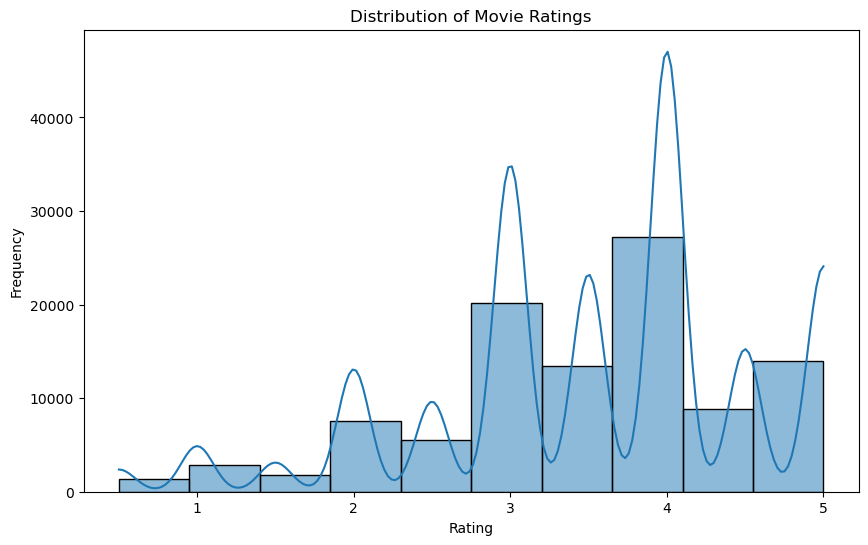

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

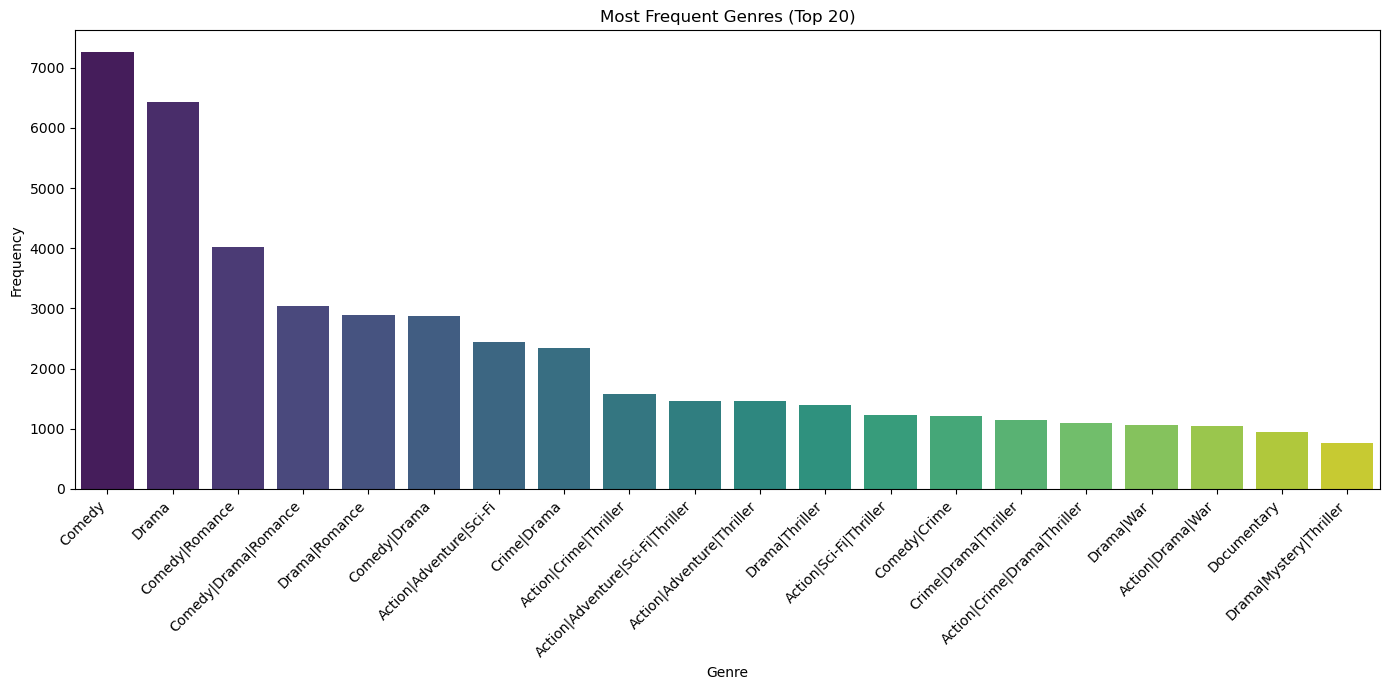

In [31]:
genre_counts = combined_df[combined_df['genres'] != '(no genres listed)']['genres'].value_counts().head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette='viridis', legend=False)
plt.title('Most Frequent Genres (Top 20)')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

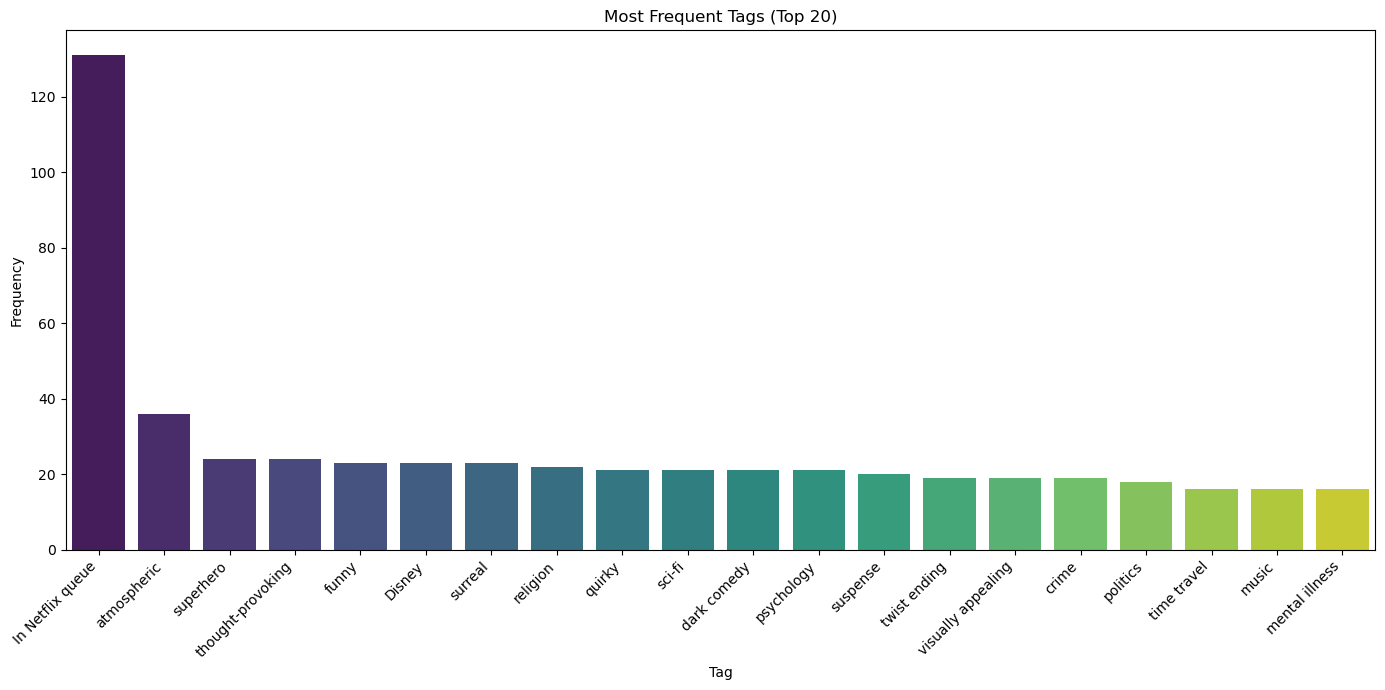

In [32]:
tag_counts = combined_df[combined_df['tag'] != 'no_tag']['tag'].value_counts().head(20)

plt.figure(figsize=(14, 7))
sns.barplot(x=tag_counts.index, y=tag_counts.values, hue=tag_counts.index, palette='viridis', legend=False)
plt.title('Most Frequent Tags (Top 20)')
plt.xlabel('Tag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

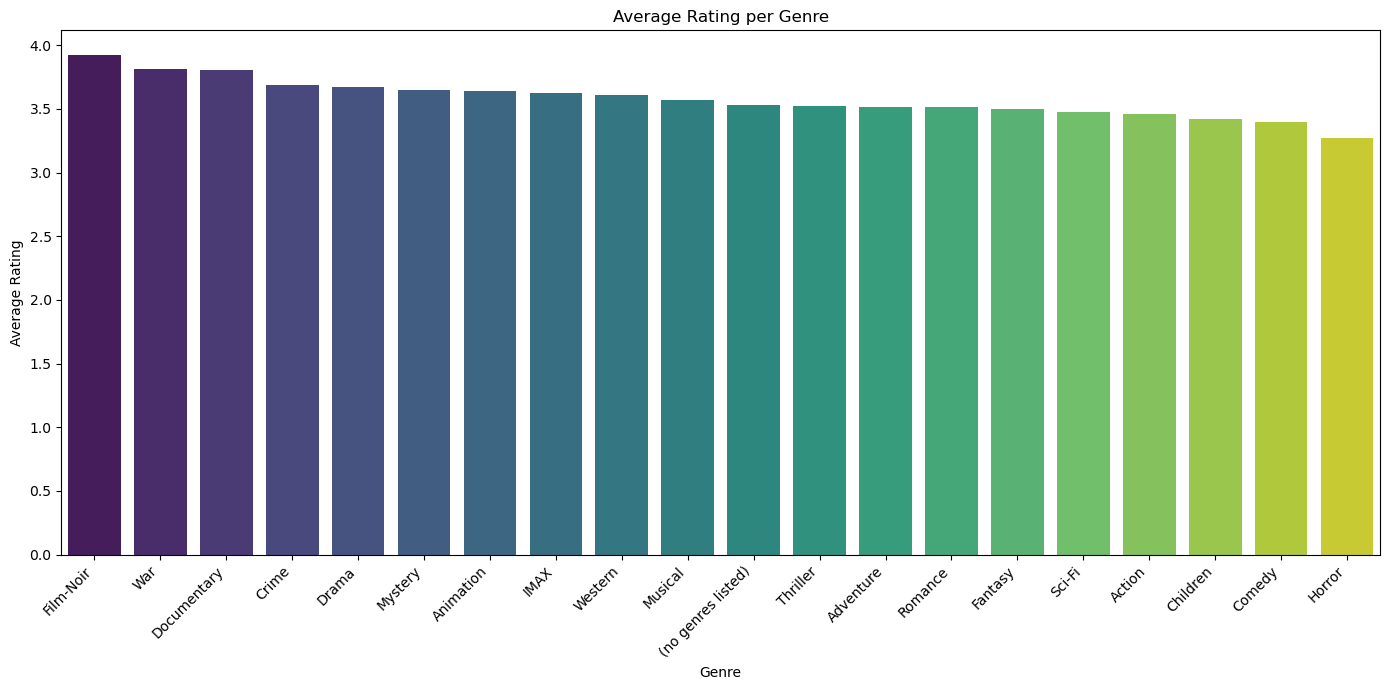

,Genre,Average Rating
10,Film-Noir,3.920455
18,War,3.810485
7,Documentary,3.806593
6,Crime,3.688081
8,Drama,3.674577
14,Mystery,3.648368
3,Animation,3.643208
12,IMAX,3.628347
19,Western,3.605799
13,Musical,3.570024


In [33]:
import seaborn as sns
#created a function here to keep the get_dummies out of the global enviornment where it could 
    #negatively impact our NF-IDF and cause issues with the recommendation system
def average_rating_per_genre(df=combined_df,genre_col='genres',rating_col='rating',plot=True,figsize=(14, 7)):

    genre_dummies = df[genre_col].str.get_dummies(sep='|')#separates genre column into a one hot encoding style df  
    temp_df = pd.concat([df, genre_dummies], axis=1)#combines combined_df and genre_dummies
    #gets avg rating of each genre in dataset
    avg_ratings = {genre: 
                   temp_df.loc[temp_df[genre] == 1, rating_col].mean()for genre in genre_dummies.columns} 
    #creates a df of the avg rating of each genre which can be seen below
    result = (pd.DataFrame(list(avg_ratings.items()),columns=['Genre', 'Average Rating']).dropna().sort_values('Average Rating', 
                                                                                                               ascending=False))
    if plot:
        plt.figure(figsize=figsize)
        sns.barplot(data=result, x='Genre', y='Average Rating',hue='Genre',palette='viridis')
        plt.xticks(rotation=45, ha='right')
        plt.title('Average Rating per Genre')
        plt.tight_layout()
        plt.show()

    return result
average_rating_per_genre()

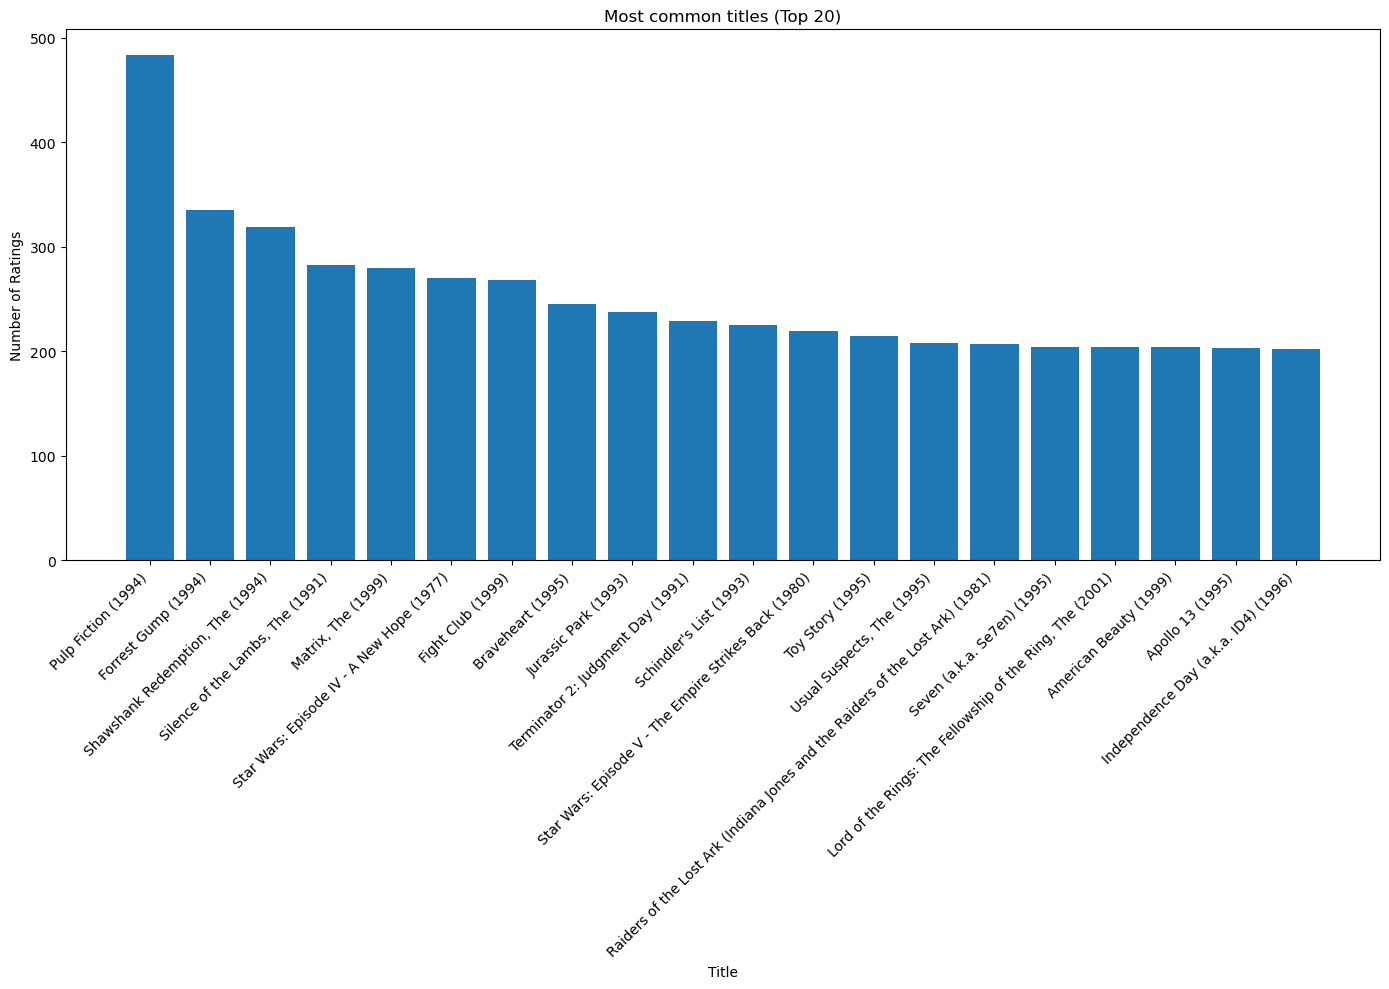

In [34]:
title_counts = combined_df['title'].value_counts().head(20)
plt.figure(figsize=(14, 10))
plt.bar(title_counts.index, title_counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Ratings')
plt.xlabel('Title')
plt.title('Most common titles (Top 20)')
plt.tight_layout()
plt.show()

In [35]:
#fills any null values with no_tag string 
combined_df['tag'].fillna('no_tag', inplace=True)

/var/folders/9s/jwyj784906ndy4td5h3gqtnw0000gn/T/ipykernel_4296/1677397703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['tag'].fillna('no_tag', inplace=True)


In [36]:
#drop any remaing null values
combined_df.dropna(inplace=True)

In [37]:
combined_df.head()

,userId,movieId,imdbId,tmdbId,title,genres,rating,rating_timestamp,tag
19827,1,804,117628,11363.0,She's the One (1996),Comedy|Romance,4.0,2000-07-30 18:08:19,no_tag
26361,1,1210,86190,1892.0,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,5.0,2000-07-30 18:08:19,no_tag
38998,1,2018,34492,3170.0,Bambi (1942),Animation|Children|Drama,5.0,2000-07-30 18:08:43,no_tag
46497,1,2628,120915,1893.0,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,4.0,2000-07-30 18:08:43,no_tag
49233,1,2826,120657,1911.0,"13th Warrior, The (1999)",Action|Adventure|Fantasy,4.0,2000-07-30 18:08:43,no_tag


**K Nearest Neighbors**

In [39]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [40]:
combined_df.columns

Index(['userId', 'movieId', 'imdbId', 'tmdbId', 'title', 'genres', 'rating',
       'rating_timestamp', 'tag'],
      dtype='object')

In [41]:
combined_df['title'].value_counts()

title
Pulp Fiction (1994)                                  484
Forrest Gump (1994)                                  335
Shawshank Redemption, The (1994)                     319
Silence of the Lambs, The (1991)                     283
Matrix, The (1999)                                   280
                                                    ... 
Death of a Cyclist (Muerte de un ciclista) (1955)      1
Ear, The (Ucho) (1970)                                 1
Autómata (Automata) (2014)                             1
Girl Walks Into a Bar (2011)                           1
Splinter (2008)                                        1
Name: count, Length: 9713, dtype: int64

In [42]:
title_counts = combined_df['title'].value_counts()
popular_titles = title_counts[title_counts > 5].index
combined_df_filtered = combined_df[combined_df['title'].isin(popular_titles)]
print(combined_df_filtered.shape)

(90217, 9)


In [43]:
len(combined_df_filtered['tag'].unique())

1385

In [44]:
combined_df_filtered[combined_df_filtered['tag'] != 'no_tag']['tag'].unique()

array(['Leonardo DiCaprio', 'Martin Scorsese', 'drugs', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

In [45]:
combined_df_filtered.columns

Index(['userId', 'movieId', 'imdbId', 'tmdbId', 'title', 'genres', 'rating',
       'rating_timestamp', 'tag'],
      dtype='object')

In [47]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import hstack
import random


# Make sure your dataframe has 'title', 'genres', 'tag' columns
# Example: combined_df_filtered = pd.read_csv('movies.csv')
combined_df_filtered = combined_df_filtered.drop_duplicates(subset=['title']).reset_index(drop=True)


# Split genres into separate tokens for TF-IDF
combined_df_filtered['genres_str'] = combined_df_filtered['genres'].str.replace('|', ' ')


# converts movie tags (text) into numeric vectors. ignores tags that don't show up at least 2x
tag_vectorizer = TfidfVectorizer(min_df=2, stop_words='english')     
# Because genres and tags are different types of information we create a sepearate vectorizer for the two
genre_vectorizer = TfidfVectorizer() 


# Compute embeddings to convert the text into numbers
tag_embeddings = tag_vectorizer.fit_transform(combined_df_filtered['tag'])
genre_embeddings = genre_vectorizer.fit_transform(combined_df_filtered['genres_str'])


movie_features = hstack([genre_embeddings, tag_embeddings]) #combines these two columns together so model can recommend using both cols

#scales each movie vector so vector length = 1. important bc Cosine similarity compares direction, not magnitude. 
#W/out normalization Movies w/ more tags → larger vectors → unfairly dominate similarity. Normalization makes comparisons fair. 
movie_features = normalize(movie_features, norm='l2', axis=1) 

In [48]:
# Fit KNN model
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=11)  # top 10 + self
knn.fit(movie_features)

#Multi-movie recommendation function

def get_recommendations_for_multiple_movies(movie_titles, n=5):
    indices = []#list where each movie is stored from the for loop
    for title in movie_titles:
        mask = combined_df_filtered['title'] == title #this finds each title in combined_df
        if mask.any():  #checks if the movie is in the dataset
            indices.append(mask.idxmax()) #gets the 1st occurrence index of the movie
    
    if not indices:
        return ["No valid movies found in dataset."]#what returns if there is no recommendation
    
    # Average feature vectors for watched movies
    user_vector = movie_features[indices].mean(axis=0)#selects the vectors of each movie watched
    user_vector = np.asarray(user_vector)  # converts to a 2D array KNN

    # Find nearest neighbors
    distances, neighbor_indices = knn.kneighbors(user_vector, n_neighbors=n+len(indices))#closest movies to the user_vector 
                                                    #and ensures we get enough movies after excluding already-watched movies.
   #turns distances and indices from 2D arrays that knn returns into 1D arrays 
    neighbor_distances = distances[0]
    neighbor_indices = neighbor_indices[0]

    # Excludes movies already watched by filtering through movies watched and then selects the ones not in indicies
    top_idx = [i for i, dist in zip(neighbor_indices, neighbor_distances) if i not in indices][:n]

    return combined_df_filtered.iloc[top_idx]['title'].values.tolist()

#movies that subject watched
watched_movies = ["Jurassic Park (1993)", "The Matrix (1999)", "Inception (2010)"] 
#calling the function
recommendations = get_recommendations_for_multiple_movies(watched_movies, n=5) 
#prints the function
print("Recommended movies:", recommendations)

Recommended movies: ['Iron Man 2 (2010)', 'Matrix Reloaded, The (2003)', 'Spider-Man 3 (2007)', 'Matrix Revolutions, The (2003)', 'Lost World: Jurassic Park, The (1997)']


In [49]:
from sklearn.metrics.pairwise import cosine_similarity
def average_similarity_to_test(user_movies, n=5, test_ratio=0.3):
    similarities = []
    random.seed(42)

    for watched_list in user_movies:
        if len(watched_list) < 2: 
            continue
        # Split into train/test
        watched_list = watched_list.copy()
        random.shuffle(watched_list)#randomly shuffles the movies put in the function
        split_idx = max(1, int(len(watched_list) * (1 - test_ratio))) # number of watched movies * (1-pct of movies tested) 
        train = watched_list[:split_idx]#all movies in watched_list up until number of split_idx
        test = watched_list[split_idx:] #starts at split_idx until the end of the list

        if not train or not test: #if the movie isnt in the train data or test date we move on to the next line
            continue

        recommended = get_recommendations_for_multiple_movies(train, n)#This is the function above for the train set
        
        # Get indices of and recommended movies 
        rec_indices = [combined_df_filtered[combined_df_filtered['title'] == t].index[0] for t in recommended if t in 
                       combined_df_filtered['title'].values]
        #Get indicies for test movies 
        test_indices = [combined_df_filtered[combined_df_filtered['title'] == t].index[0] for t in test if t in 
                        combined_df_filtered['title'].values]

        if not rec_indices or not test_indices: 
            continue

        # Compute cosine similarities for rec and test indicies
        rec_vecs = movie_features[rec_indices]
        test_vecs = movie_features[test_indices]

        sims = cosine_similarity(test_vecs, rec_vecs)#finds the cosine similarity of rec_vecs and test_vecs
        similarities.extend(sims.flatten())  # flatten all pairwise sims

    if not similarities: #returns 0 for any movies not in the similarities list at the top of this function
        return 0.0
    return np.mean(similarities) #returns the avg similarity of the selected movies  

#list of the movies user selected 
user_movies = [
    ["Jurassic Park (1993)", "The Matrix (1999)", "Inception (2010)", "Interstellar (2014)"],
    ["Toy Story (1995)", "Bambi (1942)", "Lion King (1994)"]]

#call the function
avg_sim = average_similarity_to_test(user_movies, n=5) 
#print the function
print("Average similarity to test movies:", avg_sim)

Average similarity to test movies: 0.8280133831635195


In [50]:
# Average similarity function
def average_similarity(movie_titles, n=5):
    similarities = []#store similarity scores

    indices = [] # store row indices of watched movies

    #Loop through each movie title the user watched.sLoop through each movie title the user watched.
    for t in movie_titles: 
        mask = combined_df_filtered['title'] == t #t is any title in combined_df_filtered 
        if mask.any():#checks to see if the movie is in the dataframe
            indices.append(mask[mask].index[0])  #Gets the row index of the matching movie.
            
    # Get recommended movies
    recommended = get_recommendations_for_multiple_movies(movie_titles, n)#this is the original function
    rec_indices = []#store similarity scores for recommended 
    
    #does the same thing as the for t in movie titles loop, but for the recommended movies 
    for t in recommended:
        mask = combined_df_filtered['title'] == t
        if mask.any():
            rec_indices.append(mask[mask].index[0])

    if not rec_indices or not indices:
        return 0.0  # nothing to compare

    for idx in indices:
        user_vec = movie_features[idx:idx+1]    #Gets feature vector for ONE watched movie.  # shape (1, n_features)
        rec_vecs = movie_features[rec_indices]   #Gets feature vectors for all recommended movies # shape (num_rec, n_features)

        sims = cosine_similarity(user_vec, rec_vecs)[0]  # gets cosine similarity btwn user_vec and rec_vecs [0] makes it a 1D array
        similarities.extend(sims) #adds similarity scores to the list above

    return np.mean(similarities)
#movies the user watches 
watched_movies = ["Jurassic Park (1993)", "The Matrix (1999)", "Inception (2010)"] 
#calls function
avg_sim = average_similarity(watched_movies, n=5) 
#prints function
print("Average cosine similarity of recommendations:", avg_sim)

Average cosine similarity of recommendations: 0.8910122622694898


In [51]:
combined_df_filtered

,userId,movieId,imdbId,tmdbId,title,genres,rating,rating_timestamp,tag,genres_str
0,1,804,117628,11363.0,She's the One (1996),Comedy|Romance,4.0,2000-07-30 18:08:19,no_tag,Comedy Romance
1,1,1210,86190,1892.0,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,5.0,2000-07-30 18:08:19,no_tag,Action Adventure Sci-Fi
2,1,2018,34492,3170.0,Bambi (1942),Animation|Children|Drama,5.0,2000-07-30 18:08:43,no_tag,Animation Children Drama
3,1,2628,120915,1893.0,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,4.0,2000-07-30 18:08:43,no_tag,Action Adventure Sci-Fi
4,1,2826,120657,1911.0,"13th Warrior, The (1999)",Action|Adventure|Fantasy,4.0,2000-07-30 18:08:43,no_tag,Action Adventure Fantasy
...,...,...,...,...,...,...,...,...,...,...
3294,464,74530,814255,32657.0,Percy Jackson & the Olympians: The Lightning T...,Adventure|Fantasy,2.0,2012-01-03 11:34:10,no_tag,Adventure Fantasy
3295,477,4454,188913,36107.0,More (1998),Animation|Drama|Sci-Fi|IMAX,5.0,2009-06-15 01:43:31,claymation,Animation Drama Sci-Fi IMAX
3296,477,4725,261983,10972.0,Session 9 (2001),Horror|Thriller,4.0,2009-09-13 05:36:27,Well Done,Horror Thriller
3297,567,104944,2370248,169813.0,Short Term 12 (2013),Drama,3.5,2018-05-02 18:32:46,touching,Drama


**Deployment**

In [54]:
from fastapi import FastAPI
from pydantic import BaseModel
import flask
#Define FastAPI app
app = FastAPI(title="mca")

# Request model
class RequestModel(BaseModel):
    watched_movies: list
    n: int = 5

# Recommendation function (repeated from above)
def get_recommendations_for_multiple_movies(movie_titles, n=5):
    indices = []
    for title in movie_titles:
        mask = combined_df_filtered['title'] == title
        if mask.any():
            indices.append(mask.idxmax())
    if not indices:
        return ["No valid movies found in dataset."]
    
    
    user_vector = movie_features[indices].mean(axis=0)
    user_vector = np.asarray(user_vector)  

    
    distances, neighbor_indices = knn.kneighbors(user_vector, n_neighbors=n + len(indices))
    neighbor_distances = distances[0]
    neighbor_indices = neighbor_indices[0]

   
    top_idx = [i for i, dist in zip(neighbor_indices, neighbor_distances) if i not in indices][:n]

    return combined_df_filtered.iloc[top_idx]['title'].values.tolist()

#API endpoint
@app.post("/recommend")
def recommend_movies(request: RequestModel):
    recs = get_recommendations_for_multiple_movies(request.watched_movies, request.n)
    return {"recommendations": recs}
